# FLEX

This notebook plots the time series of the surface forcing and simulated sea surface temperature and mixed layer depth in the [FLEX](https://gotm.net/cases/flex/) test case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import get_mld_deltaT

## Load data

First, store the information of the five simulations into lists and dictionaries. 

In [2]:
casenames = [
    'GLS-C01A_tidal',
    'GLS-C01A',
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]

colors = {
    'GLS-C01A_tidal': 'tab:blue',
    'GLS-C01A': 'tab:blue',
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

linestyles = {
    'GLS-C01A_tidal': '--',
    'GLS-C01A': '-',
    'KPP-CVMix': '-',
    'KPPLT-VR12': '-',
    'KPPLT-LF17': '-',
    }

casedir = '../gotm/run/FLEX'
save_fig = True

Load data into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sims
    dataset[case] = sim.load_data()

## Figure

Time series of (a) net surface heat flux (W m$^{-2}$), (b) surface friction velocity (m s$^{-1}$), (c) La$_t^{-2}$ where La$_t$ is the turbulent Langmuir number, (d) sea surface temperature (SST; $^\circ$C), and (e) mixed layer depth (MLD; m) defined by a 0.2 $^\circ$C temperature threshold referenced to the surface.

/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


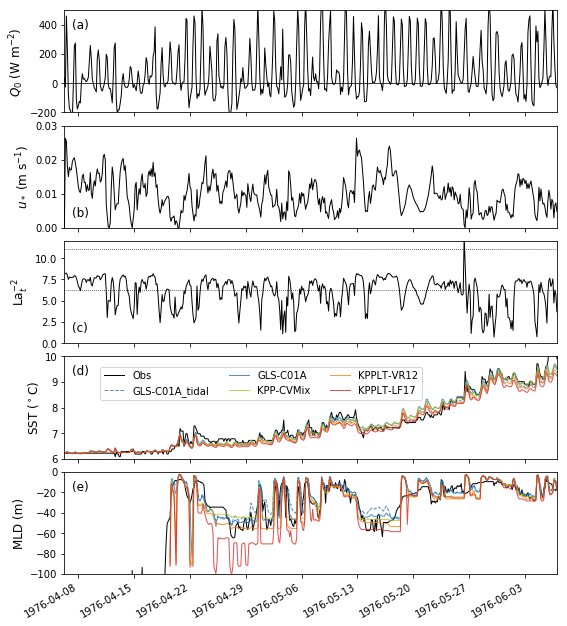

In [4]:
fig, axarr = plt.subplots(5,sharex='col')
fig.set_size_inches([8,9])

rho_w = 1000.
data    = dataset['KPP-CVMix']
ustar   = data.u_taus
laturb  = data.La_Turb
laturb  = laturb.where(laturb < 1.e3, drop=True)
heat    = data.heat
I0      = data.I_0
tflux   = heat + I0
time    = data.time
time_start = time[0]
time_end = time[-1]

tflux.plot(ax=axarr[0], color='k', linewidth=1)
# tflux.rolling(time=8, center=True).mean().plot(
#     ax=axarr[0], color='k', linewidth=1.5)
ustar.plot(ax=axarr[1], color='k', linewidth=1)
# ustar.rolling(time=8, center=True).mean().plot(
#     ax=axarr[1], color='k', linewidth=1.5)
(laturb**(-2)).plot(ax=axarr[2], color='k', linewidth=1)
# (laturb**(-2)).rolling(time=8, center=True).mean().plot(
# ax=axarr[2], color='k', linewidth=1.5)

data.sst_obs[:,0,0].rolling(time=1, center=True).mean().plot(
    color='k', linestyle='-', linewidth=1, ax=axarr[3], label='Obs')

mld_obs = -get_mld_deltaT(data.temp_obs[:,:,0,0], zRef=0.)
mld_obs.rolling(time=1, center=True).mean().plot(
    ax=axarr[4], color='k', linewidth=1, label='Obs')

for case in casenames:
    temp = dataset[case].temp
    temp[-1,:,0,0].rolling(time=1, center=True).mean().plot(
        ax=axarr[3], color=colors[case], linestyle=linestyles[case],
        linewidth=1, alpha=0.8, label=case)

    mld = -get_mld_deltaT(temp[:,:,0,0], zRef=0.)
    mld = mld.where(mld.values>-140.)
    mld.rolling(time=1, center=True).mean().plot(
        ax=axarr[4], color=colors[case], linestyle=linestyles[case],
        linewidth=1, alpha=0.8, label=case)

axarr[3].legend(loc = 'upper center', fontsize=10, ncol=3,
                  bbox_to_anchor=(0.4, 0.95))

axarr[0].set_ylabel('$Q_0$ (W m$^{-2}$)', fontsize=12)
axarr[0].axhline(0, color='k', linewidth=0.75)
axarr[0].set_ylim([-200, 500])
axarr[1].set_ylabel('$u_*$ (m s$^{-1}$)', fontsize=12)
axarr[1].set_ylim([0, 0.03])
axarr[2].axhline(0.3**(-2), color='k', linestyle=':', linewidth=0.75)
axarr[2].axhline(0.4**(-2), color='k', linestyle=':', linewidth=0.75)
axarr[2].set_ylim([0, 12])
axarr[2].set_ylabel('La$_t^{-2}$', fontsize=12)
axarr[3].set_ylabel('SST ($^\circ$C)', fontsize=12)
axarr[3].set_ylim([6, 10])
axarr[4].set_ylim([-100, 0])
axarr[4].set_ylabel('MLD (m)', fontsize=12)

for i, ax in enumerate(axarr):
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xlim([time_start,time_end])
    ax.set_xticks([np.datetime64('1976-04-08'),
                   np.datetime64('1976-04-15'),
                   np.datetime64('1976-04-22'),
                   np.datetime64('1976-04-29'),
                   np.datetime64('1976-05-06'),
                   np.datetime64('1976-05-13'),
                   np.datetime64('1976-05-20'),
                   np.datetime64('1976-05-27'),
                   np.datetime64('1976-06-03'),
                  ])
    if i == 1 or i == 2:
        ax.text(0.015, 0.08, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
                fontsize=12, va='bottom')
    else:
        ax.text(0.015, 0.92, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
                fontsize=12, va='top')
    
if save_fig:
    plt.subplots_adjust(top=0.97, bottom=0.1, right=0.98, hspace=0.13)
    figname = 'flex_ts.pdf'
    fig.savefig(figname, dpi=300)